<h1>Data Preprocessing</h1>

<h3>Introduction</h3>

This file contains the different functionalities used to pre-process the data. We will try different techniques of data-balancing to generate multiple dataset that contain different properties and experiment by using them to train models.

<h3>Imports and Constants</h3>

This cell will be used to import the libraries we need for this file

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

This cell contains the constants / information that will be used throughout this process

In [70]:
DATASET_FILE_NAME = "../dataset/dataset.csv"
LABEL_COLUMN_NAME = "Potability"

<h3>File Extraction</h3>

This function will extract the data from the CSV file and store it in a Pandas Dataframe

In [71]:
'''
Function that extracts data from a CSV file
type filename str
rtype pd.DataFrame
'''
def extract_data(filename):
    df = pd.read_csv(filename)
    return df

In [72]:
'''
Function that plots label frequency from dataset
type
'''
def plot_label_frequency(df):
    f, ax = plt.subplots(figsize=(5,3))
    potable_count = len(df[df['Potability']==1])
    not_potable_count = len(df[df['Potability']==0])
    labels = ["Potable", "Not Potable"]
    frequency = [potable_count, not_potable_count]
    plt.bar(labels, frequency, width=0.5)
    plt.xlabel("Type")
    plt.ylabel("Frequency")
    plt.title("Frequency of the labels in the Dataset")
    plt.show()
   

'''
Function that prints the percentages of the labels
'''
def print_label_percentages(df):
    potable_count = len(df[df['Potability']==1])
    not_potable_count = len(df[df['Potability']==0])
    print('Potable: %.2f%%' % (potable_count/(potable_count + not_potable_count) * 100))
    print('Not potable: %.2f%%' % (not_potable_count/(potable_count + not_potable_count) * 100))

Let's run this function and see what our data looks like in a structured manner

In [73]:
extract_data(DATASET_FILE_NAME)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


<b>From this information, we can notice 3 things:</b>
<ol>
    <li>There are 3275 rows in our data</li>
    <li>There are 9 features and 1 label available to us</li>
    <li>The dataset is not perfect, there are some missing values (example: ph at row 0 and Sulfate at row 1)</li>
</ol>
<b>We will try to deal with these missing features in two ways:</b>
<ol>
    <li>Remove the rows that contain missing features</li>
    <li>Populate the missing features with median values (the median of the features from all the other rows)</li>
</ol>

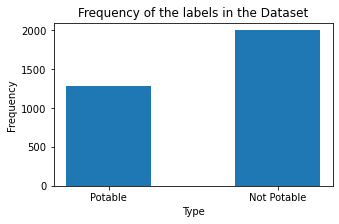

Potable: 39.01%
Not potable: 60.99%


In [74]:
plot_label_frequency(extract_data(DATASET_FILE_NAME))

print_label_percentages(extract_data(DATASET_FILE_NAME))

We also notice that there are much more Not Potable datapoints that potable datapoints

<h3>Feature Management</h3>

This section contains the helper functions that will pre-process the data in the two ways aforementioned

<b>Row deletion approach</b><br/>
This function will delete all the rows that have missing data

In [75]:
'''
This function takes a pandas dataframe and deletes all the rows that contain missing values
type df DataFrame
rtype DataFrame
'''
def row_deletion_preprocessing(df):
    return df.dropna(how='any')

Let's test it out and see if the preview still contains missing values

In [76]:
df = extract_data(DATASET_FILE_NAME)
row_deletion_preprocessing(df)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


We notice that our dataframe doesn't contain any <b>NaN</b>, but some <b>rows are missing</b> (indices 0, 1, 2...)

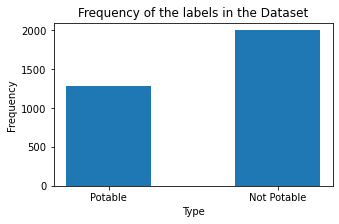

In [77]:
plot_label_frequency(df)

The row deletion method hasn't affected frequency that much

<b>Row Filling approach</b><br/>
This function will fill the missing values with the mean of the column

In [78]:
'''
This function takes a pandas dataframe and fills the missing values with the column mean
'''
def row_filling_preprocessing(df):
    return df.fillna(df.mean())

Let's test it out to see if the preview contains missing rows or missing values

In [79]:
df = extract_data(DATASET_FILE_NAME)
row_filling_preprocessing(df)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


We can see that the rows that were missing after the row deletion preprocessing <b>are still here</b>, and we can notice that there are <b>no missing values</b><br/>
All the values that <b>were missing</b> (example: Sulfate at rows 1, 2, 3272, 3273, 3274, 3275) now contain the same value <b>333.78</b> which seems close to the other values from the same column

Now that the different pre-processing steps have been executed, we can separate our data at first, then implement a function that regroups all the steps that we've created that can be exported.

<h3>Data Extraction</h3>

This section will separate the data into two parts: the <b>features</b> and the <b>labels</b>

This function takes a dataframe and returns two matrices: the features matrix <b>X</b> and the label matrix <b>y</b>

In [80]:
'''
This function takes a pandas DataFrame and separates it into features and labels
type df DataFrame
rtype DataFrame
'''
def separate_data(df):
    X = df.drop([LABEL_COLUMN_NAME], axis=1)
    y = df[LABEL_COLUMN_NAME]
    return X, y

Let's test our function out by first extracting the <b>two DataFrames X and y</b>

In [81]:
df = extract_data(DATASET_FILE_NAME)
X, y = separate_data(df)

Then display X, ensuring that there is no column for the label <b>"Potability"</b>

In [82]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658


And display y ensuring that there is only the label "Potability" that contains either <b>0 or 1s</b>

In [83]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

<h3>Main Functionality</h3>

The last step is to create a customizable function that groups the entire pipeline for the end-user to import during the model training implementation.

In [84]:
from sklearn.utils import resample

def downsample(df):
    minority = df[df["Potability"] == 1]
    majority = df[df["Potability"] == 0]
    
    majority_downsampled = resample(majority, replace=True, n_samples=len(minority), random_state=42)
    
    downsampled = pd.concat([minority, majority_downsampled])
    return downsampled

'''
Function that groups the entire data-preprocessing pipeline
type filename string
type empty string : none, delete, fill
rtype DataFrame
'''

from imblearn.over_sampling import SMOTE

def preprocess_data(filename, empty="none", optimize_features=False, normalize=False, balancing="none"):
    df = extract_data(filename)
    
    if balancing == "downsample":
        df = downsample(df)
    
    if optimize_features:
        df = df[['ph', 'Chloramines', 'Sulfate', 'Organic_carbon', 'Potability']]
        
    if empty == "delete":
        df = row_deletion_preprocessing(df)
    elif empty == "fill":
        df = row_filling_preprocessing(df)
        
    X, y = separate_data(df)
    
    if normalize:
        scaler = StandardScaler()
        scaler.fit(X)
        X = scaler.transform(X)
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    if balancing == "SMOTE":
        sm = SMOTE(random_state=42)
        X_train, y_train = sm.fit_resample(X_train, y_train)
    
    return X_train, X_test, y_train, y_test

Now that the main functionality is implemented, we can use the data_preprocessing function in the model pipeline to extract and manage our data, then tests the different parameters combination to get optimal results

In [85]:
X_train, X_test, y_train, y_test = preprocess_data(DATASET_FILE_NAME, empty='fill')

In [86]:
X_train, X_test, y_train, y_test = preprocess_data("../dataset/dataset.csv", empty = "fill", normalize=True)